<a href="https://colab.research.google.com/github/aidanjjoyce/Black-Hole-Simulations/blob/main/Black_Hole_Simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2D Black Hole Simulations

In [83]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

TODO
* Throw exception if orbits become too large to stop crazy plots
* Plot k(h,a_semimajor) and indicate current orbit




# Newtonian Gravity

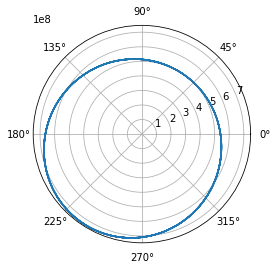

In [84]:
##Newtonian gravity

# Plots a Newtonian orbit 
def plotNewtonianOrbit(r0, G, M, h, angle):
  
  def shape_eqn(r, p, G, M, h):
    return [r[1], 2/r[0]*r[1]**2 + r[0] - G*M*r[0]**2/h**2]

  ps = np.linspace(1,10*np.pi,10000)
  rs = odeint(shape_eqn, r0, ps, args=(G,M,h))
  rs = abs(rs[:,0])

  plt.polar(ps, rs)
  plt.show()
  
r0, G, M, h, angle = [5e8,0], 7e-11, 6e24, 5e11, 10*np.pi
plotNewtonianOrbit(r0, G, M, h, angle)

[[1.00000000e+00 0.00000000e+00]
 [6.08653054e+02 1.92156768e-04]
 [9.66155046e+02 3.05208826e-04]
 ...
 [6.06652162e+04 1.92106079e-02]
 [6.07056228e+04 1.92234576e-02]
 [6.07460154e+04 1.92363030e-02]]


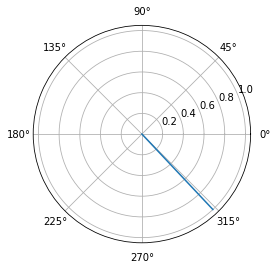

In [85]:
##Plots the path of an unbound orbit

x0, E, h, M, G, m = [1,0], 0, 1e-3, 1, 1e10, 1

def odes(x, t, E, h, m, M, G):
  R = x[0]
  P = x[1]
  return [np.sqrt(2*E/m - h**2/2*m*R**2 + G*M/R), np.sqrt(h/R)]

ts = np.linspace(0, 100, 1000)
xs = odeint(odes, x0, ts, args=(E, h, m, M, G))
print(xs)

plt.polar(xs[1], xs[0])
plt.show()


# The Schwarzschild Metric

In [86]:
#Defines the ODE describing radius change, r, with angle, p, in the 
#Schwarzschild metric for a massive particle

def SS_MassiveShapeEqn(r, p, G, M, c, h):
  return [r[1], 2/r[0]*r[1]**2 + r[0] - G*M*r[0]**2/h**2 - 3*G*M/c**2]

#Defines the ODE describing radius change, r, with angle, p, in the 
#Schwarzschild metric for a massless particle

def SS_MasslessShapeEqn(r, p, G, M, c):
  return [r[1], 2/r[0]*r[1]**2 + r[0] - 3*G*M/c**2]

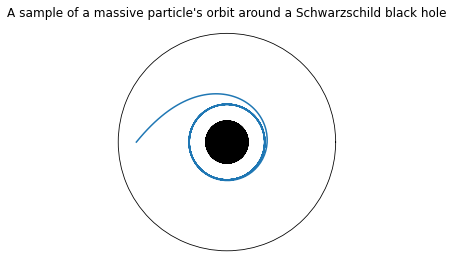

In [87]:
#Example of plotting an orbit for a massive particle around a Schwarzschild black hole

G, M, c = 7e-11, 6e24, 3e8
Rs = 2*G*M/c**2             #Calculates the Schwarzschild radius 

#Plots the event horizon of the black hole

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_title("A sample of a massive particle's orbit around a Schwarzschild black hole")
ps = np.linspace(0, 937*np.pi,20000)
ax.plot(ps,[i * Rs / 20000 for i in range(0, 20000, 1) ],'k')
ax.set_rticks([])
ax.set_xticks([])
ax.grid(False)

#Plots an orbit with given initial radius, dr/dp, and h

r0 = [1.8*Rs,0*Rs]                              #Initial radius and dr/dp
hCirc = np.sqrt(G*M*r0[0]**2/(r0[0] - 3*Rs/2)) #h required for circular orbit
h = 1*hCirc
samples = 1000
ps = np.linspace(0,17*np.pi,samples)
rs = odeint(SS_MassiveShapeEqn, r0, ps, args=(G,M,c,h))
ax.plot(ps, rs[:,0])            
ax.set_rmax(1.2*np.amax(rs))

plt.show()

/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


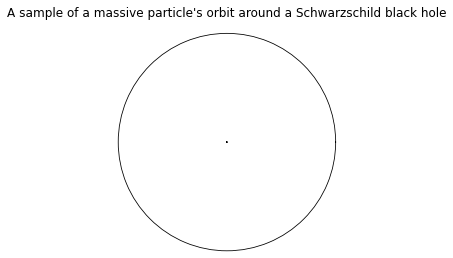

In [98]:
#Plots an orbit around a Schwarzschild black hole, radius Rs, with initial
#position given by r0, and angular momentum as a fraction of the angular
#momentum of a circular orbit of the same inital radius

def SS_MassivePlotter(Rs, r0, hFrac, orbits, samples):

  fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
  ax.set_title("A sample of a massive particle's orbit around a Schwarzschild black hole")
  ps = np.linspace(0, 937*np.pi,20000)
  ax.plot(ps,[i * Rs / 20000 for i in range(0, 20000, 1) ],'k')
  ax.set_rticks([])
  ax.set_xticks([])
  ax.grid(False)

  #Plots an orbit with given initial radius, dr/dp, and h
                       
  hCirc = np.sqrt(G*M*r0[0]**2/(r0[0] - 3*Rs/2)) #h required for circular orbit
  h = hFrac*hCirc
  ps = np.linspace(0,2*np.pi*orbits,samples)
  rs = odeint(SS_MassiveShapeEqn, r0, ps, args=(G,M,c,h))
  ax.plot(ps, rs[:,0])            
  ax.set_rmax(1.2*np.amax(rs))

  plt.show()

Rs = 1000
r0 = [3*Rs, 0]
hFrac = 1
orbits = 1
samples = 1000
SS_MassivePlotter(1,r0,hFrac,orbits,samples)  

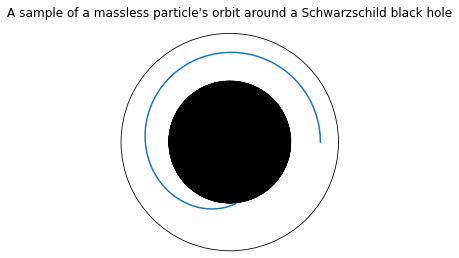

In [89]:
#Example of plotting an orbit for a massless particle around a Schwarzschild black hole

G, M, c = 7e-11, 6e24, 3e8
Rs = 2*G*M/c**2             #Calculates the Schwarzschild radius 

#Plots the event horizon of the black hole

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_title("A sample of a massless particle's orbit around a Schwarzschild black hole")
ps = np.linspace(0, 937*np.pi,20000)
ax.plot(ps,[i * Rs / 20000 for i in range(0, 20000, 1) ],'k')
ax.set_rticks([])
ax.set_xticks([])
ax.grid(False)

#Plots an orbit with given initial radius, dr/dp, and h

r0 = [1.49*Rs,0*Rs]                              #Initial radius and dr/dp
samples = 1000
ps = np.linspace(0,1.53*np.pi,samples)
rs = odeint(SS_MasslessShapeEqn, r0, ps, args=(G,M,c))
ax.plot(ps, rs[:,0])            
ax.set_rmax(1.2*np.amax(rs))

plt.show()

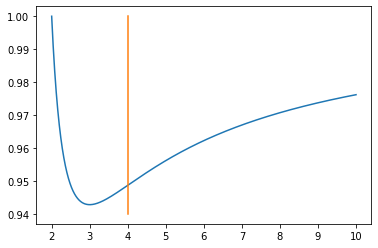

In [90]:
##Plots the energy of circular orbits around Schwarzschild black hole
Rs = 1

def k(r, Rs):
  return (1 - Rs/r) / np.sqrt(1-3*Rs/(2*r))

rs = np.linspace(2*Rs,10*Rs, 1000)
ks = k(rs, Rs)
plt.plot(rs,ks)
R = 4
plt.plot([R,R],[0.94,1])
plt.show()

##The Precession of Mercury's Orbit

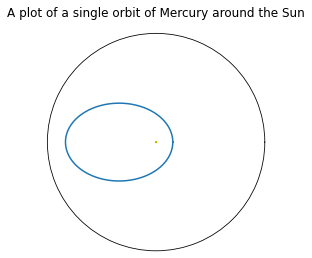

In [91]:
G, M, c = 6.67e-11, 1.99e30, 3e8  #Relevant parameters for the sun
Rs = 2*G*M/c**2                   #Calculates the Schwarzschild radius 
RSolar = 6.96e8                   #Sun's radius

#Plots the surface of the sun

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_title("A plot of a single orbit of Mercury around the Sun")
ps = np.linspace(0, 937*np.pi,20000)
ax.plot(ps,[i * RSolar / 20000 for i in range(0, 20000, 1) ],'y')
ax.set_rticks([])
ax.set_xticks([])
ax.grid(False)

#Plots an orbit with given initial radius, dr/dp, and h

r0 = [4.60e10,0]                   #Initial radius and dr/dp
h = -6.98e4 * 4.60e10              #h = L/m = vr at perihelion
samples = 1000
ps = np.linspace(0,2*np.pi,samples)
rs = odeint(SS_MassiveShapeEqn, r0, ps, args=(G,M,c,h))
ax.plot(ps, rs[:,0])            
ax.set_rmax(1.2*np.amax(rs))

plt.show()

4147.727272727273


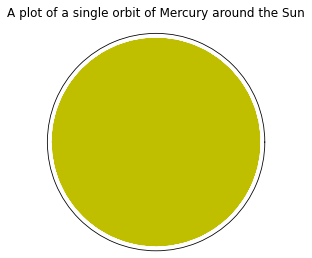

In [92]:
#A plot of the precession of Mercury's perihelion
#A 15 degree precession should take ~10,000 years

G, M, c = 6.67e-11, 1.99e30, 3e8  #Relevant parameters for the sun
Rs = 2*G*M/c**2                   #Calculates the Schwarzschild radius 
RSolar = 6.96e8                   #Sun's radius

#Calculates number of orbits completed in 10,000 years

TMercury = 880/365               #Orbital period of mercury in years
NOrbits = 10000/TMercury         #Number of orbits in 10,000 years
print(NOrbits)

#Plots the surface of the sun

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_title("A plot of a single orbit of Mercury around the Sun")
ps = np.linspace(0, 937*np.pi,20000)
ax.plot(ps,[i * RSolar / 20000 for i in range(0, 20000, 1) ],'y')
ax.set_rticks([])
ax.set_xticks([])
ax.grid(False)

#Plots an orbit with given initial radius, dr/dp, and h
#Commented because takes a while to run

r0 = [4.60e10,0]                   #Initial radius and dr/dp
h = -6.98e4 * 4.60e10              #h = L/m = vr at perihelion
samples = int(100*NOrbits)
#ps = np.linspace(0,2*NOrbits*np.pi,samples)
#rs = odeint(SS_MassiveShapeEqn, r0, ps, args=(G,M,c,h))
#ax.plot(ps, rs[:,0])            
#ax.set_rmax(1.2*np.amax(rs))

plt.show()

##Stability of Orbits

##Gravitational Lensing

# The Kerr Metric

In [93]:
def Kerr_MassiveShapeEqn(x,t,c,Rs,a,h,k):
  
  T = x[0]
  R = x[1]
  P = x[2]

  #Define discriminant
  D = R**2 - Rs*R + a**2

  dTdt = (k*c*((R+Rs)*a**2 + R**3) - h*a*Rs) / (R*D*c)
  dRdt = np.sqrt(c**2*(k**2 - 1) + Rs*c**2/R - (h**2 - a**2*c**2*(k**2 - 1))/R**2 + Rs*(h-a*c*k)**2/R**3)
  dPdt = (h*(R - Rs) + k*c*a*Rs) / (R*D)
  
  return [dTdt,dRdt,dPdt]

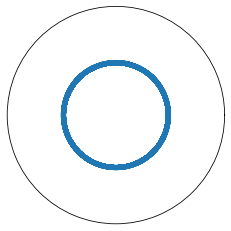

In [94]:
G, M, c = 6.67e-11, 1.99e30, 3e8  
Rs = 2*G*M/c**2
a = 0*Rs
x0 = [0,3*Rs,0]       
kCirc = (1-Rs/x0[1]+a*np.sqrt(Rs/(2*x0[1]**3)))/np.sqrt(1-3*Rs/(2*x0[1])+2*a*np.sqrt(Rs/(2*x0[1]**3)))           
hCirc = c*(np.sqrt(Rs*x0[1]/2)-a*Rs/x0[1]+a**2*np.sqrt(Rs/(2*x0[1]**3)))/np.sqrt(1-3*Rs/(2*x0[1])+2*a*np.sqrt(Rs/(2*x0[1]**3)))
k, h = kCirc, hCirc          

#Plots an orbit with given initial radius, dr/dp, and h

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
samples = 1000
t = np.linspace(0,1,samples)
xs = odeint(Kerr_MassiveShapeEqn, x0, t, args=(c,Rs,a,h,k))
ax.plot(xs[:,2], xs[:,1])
ax.set_rticks([])
ax.set_xticks([])
ax.grid(False)           

plt.show()

## The Ergosphere

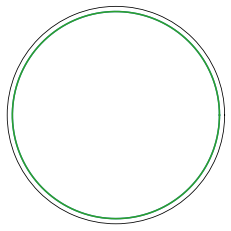

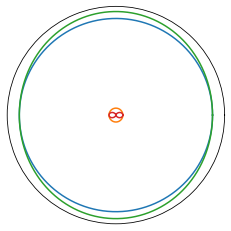

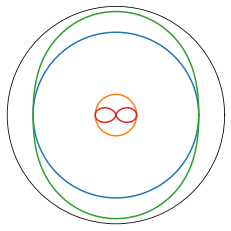

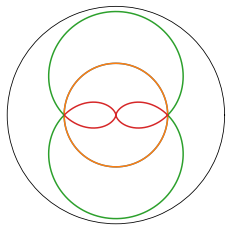

In [95]:
##Event horizon and ergosphere plotter

def KerrSurfaces(mu, a):

  def event_horizon():
    return [mu+np.sqrt(mu**2 - a**2), mu-np.sqrt(mu**2 -a**2)] 

  def SLS(T):
    return [mu+np.sqrt(mu**2 - a**2 * np.cos(T)**2), mu-np.sqrt(mu**2 -a**2 * np.cos(T)**2)]

  T = np.linspace(0,2*np.pi,1000)
  EH0 = np.full((1000,), event_horizon()[0])
  EH1 = np.full((1000,), event_horizon()[1])

  fig1, ax1 = plt.subplots(subplot_kw={'projection': 'polar'})
  ax1.plot(T,EH0)
  ax1.plot(T,EH1)
  ax1.plot(T,SLS(T)[0])
  ax1.plot(T,SLS(T)[1])
  ax1.set_rticks([])
  ax1.set_xticks([])
  ax1.grid(False)           


KerrSurfaces(1,0)
KerrSurfaces(1,0.5) 
KerrSurfaces(1,0.8)
KerrSurfaces(1,1)
